# Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Import the data

In [2]:
loan_data_with_dummies = pd.read_csv('loan_data_2007_2014_for_LGD_EAD.csv')

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11808\2023231765.py:1: DtypeWarning: Columns (20,48,56,113,124,125,126,129,130,131,134,140,141,142) have mixed types. Specify dtype option on import or set low_memory=False.
  loan_data_with_dummies = pd.read_csv('loan_data_2007_2014_for_LGD_EAD.csv')


# Explore the data

In [3]:
loan_data_preprocessed = loan_data_with_dummies.copy()

In [4]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [5]:
loan_data_preprocessed.columns

Index(['Unnamed: 0', 'id', 'member_id', 'loan_amnt', 'funded_amnt',
       'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade',
       ...
       'purpose:major_purchase', 'purpose:medical', 'purpose:moving',
       'purpose:other', 'purpose:renewable_energy', 'purpose:small_business',
       'purpose:vacation', 'purpose:wedding', 'initial_list_status:f',
       'initial_list_status:w'],
      dtype='object', length=185)

In [6]:
loan_data_preprocessed['loan_status'].unique()

array(['Current', 'Fully Paid', 'Late (31-120 days)', 'In Grace Period',
       'Charged Off', 'Late (16-30 days)', 'Default',
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [7]:
loan_data_defaults = loan_data_preprocessed[loan_data_preprocessed['loan_status'].isin(['Charged Off',
                                                                                        'Does not meet the credit policy. Status:Charged Off'])]

In [8]:
loan_data_defaults.shape

(262416, 185)

In [9]:
loan_data_defaults.isnull().sum()

Unnamed: 0                                         0
id                                            262416
member_id                                     262416
loan_amnt                                          0
funded_amnt                                        0
funded_amnt_inv                                    0
term                                               0
int_rate                                           0
installment                                        0
grade                                              0
sub_grade                                          0
emp_title                                      21743
emp_length                                     20409
home_ownership                                     0
annual_inc                                         0
verification_status                                0
issue_d                                            0
loan_status                                        0
pymnt_plan                                    

Independent Variables

In [10]:
loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace=True)
loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)

loan_data_defaults['dti'].fillna(loan_data_defaults['dti'].median(), inplace=True)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11808\1168129621.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_delinq'].fillna(0, inplace=True)
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11808\1168129621.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['mths_since_last_record'].fillna(0, inplace=True)
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11808\1168129621.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/ind

# Dependent Variables

For LGD

In [11]:
loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11808\2670870593.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = loan_data_defaults['recoveries'] / loan_data_defaults['funded_amnt']


In [12]:
loan_data_defaults['recovery_rate'].describe()

count    262416.000000
mean          0.073270
std           0.094347
min           0.000000
25%           0.000000
50%           0.058417
75%           0.110310
max           2.170300
Name: recovery_rate, dtype: float64

(array([1.02735e+05, 1.45590e+04, 2.02140e+04, 2.69730e+04, 3.03410e+04,
        2.46750e+04, 1.59420e+04, 6.36000e+03, 4.36000e+03, 3.16500e+03,
        1.62800e+03, 1.14900e+03, 1.03000e+03, 1.04600e+03, 1.04100e+03,
        1.03300e+03, 9.79000e+02, 8.35000e+02, 8.16000e+02, 6.65000e+02,
        5.34000e+02, 4.03000e+02, 2.87000e+02, 2.55000e+02, 1.85000e+02,
        1.26000e+02, 1.10000e+02, 1.00000e+02, 8.60000e+01, 7.50000e+01,
        6.00000e+01, 5.50000e+01, 3.60000e+01, 3.70000e+01, 4.80000e+01,
        4.70000e+01, 4.10000e+01, 2.90000e+01, 2.80000e+01, 4.10000e+01,
        3.10000e+01, 3.00000e+01, 2.60000e+01, 3.90000e+01, 2.80000e+01,
        2.50000e+01, 2.30000e+01, 2.40000e+01, 2.70000e+01, 9.00000e+00,
        7.00000e+00, 6.00000e+00, 2.00000e+00, 0.00000e+00, 3.00000e+00,
        1.00000e+00, 4.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00

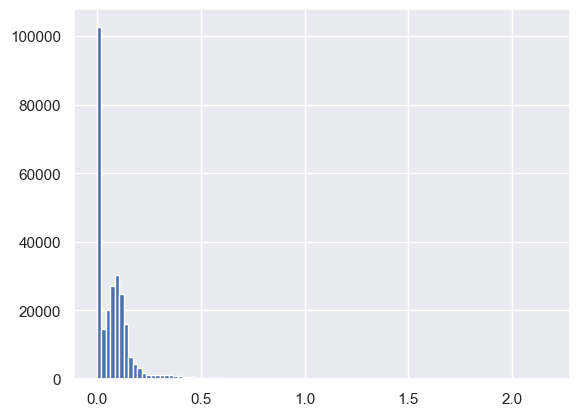

In [13]:
plt.hist(loan_data_defaults['recovery_rate'], 100)

In [14]:
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11808\1601776879.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] > 1, 1, loan_data_defaults['recovery_rate'])
C:\Users\Anticus\AppData\Local\Temp\ipykernel_11808\1601776879.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate'] = np.where(loan_data_defaults['recovery_rate'] < 0, 0, loan_data_defaults['recovery_rate'])


(array([9.7488e+04, 4.3980e+03, 5.3610e+03, 7.4850e+03, 7.8050e+03,
        1.0144e+04, 9.8860e+03, 1.2349e+04, 1.4482e+04, 1.5304e+04,
        1.1763e+04, 1.0924e+04, 1.1861e+04, 1.0438e+04, 5.1370e+03,
        3.0880e+03, 2.9000e+03, 2.6100e+03, 1.8350e+03, 1.6630e+03,
        1.5950e+03, 1.1060e+03, 7.8900e+02, 5.9900e+02, 5.1900e+02,
        5.4800e+02, 4.9300e+02, 4.6900e+02, 4.8000e+02, 4.4300e+02,
        5.1700e+02, 4.8600e+02, 4.5600e+02, 4.8000e+02, 4.8300e+02,
        4.5700e+02, 4.3300e+02, 3.7000e+02, 4.0100e+02, 3.6500e+02,
        4.0700e+02, 3.0900e+02, 3.0500e+02, 2.6200e+02, 2.4500e+02,
        2.2300e+02, 1.8900e+02, 1.6400e+02, 1.4400e+02, 1.2300e+02,
        1.3200e+02, 9.9000e+01, 9.7000e+01, 7.9000e+01, 6.8000e+01,
        6.2000e+01, 4.9000e+01, 5.1000e+01, 4.9000e+01, 3.9000e+01,
        5.1000e+01, 3.7000e+01, 4.7000e+01, 3.5000e+01, 2.8000e+01,
        2.9000e+01, 2.8000e+01, 2.4000e+01, 2.8000e+01, 1.8000e+01,
        2.1000e+01, 1.2000e+01, 1.9000e+01, 1.80

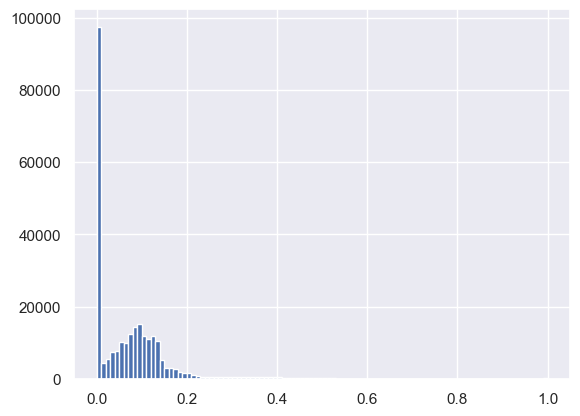

In [15]:
plt.hist(loan_data_defaults['recovery_rate'], 100)

(array([99830., 62204.,  7036.,  4444.,  2364.,   718.,   320.,   197.,
          146.,   242.]),
 array([3.33333333e-07, 1.00000300e-01, 2.00000267e-01, 3.00000233e-01,
        4.00000200e-01, 5.00000167e-01, 6.00000133e-01, 7.00000100e-01,
        8.00000067e-01, 9.00000033e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

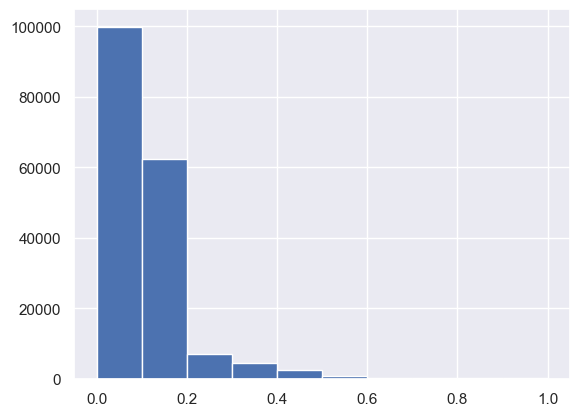

In [16]:
plt.hist(loan_data_defaults.loc[loan_data_defaults['recovery_rate'] > 0, 'recovery_rate'])

For EAD

In [17]:
# The maximum that a lender can lose if a borrower default that it is still Outstanding, in percentage % = Credit conversion factor = CCF
loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11808\627562337.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['CCF'] = (loan_data_defaults['funded_amnt'] - loan_data_defaults['total_rec_prncp']) / loan_data_defaults['funded_amnt']


In [18]:
loan_data_defaults['CCF'].describe()

count    262416.000000
mean          0.698281
std           0.218080
min           0.000000
25%           0.568441
50%           0.748344
75%           0.872427
max           1.000000
Name: CCF, dtype: float64

Export the loan_data_defaults

In [120]:
# loan_data_defaults.to_csv('loan_data_defaults.csv')

# Explore dependent variables 

(array([1.01886e+05, 1.28460e+04, 1.79490e+04, 2.22350e+04, 2.97860e+04,
        2.26870e+04, 2.22990e+04, 8.22500e+03, 5.51000e+03, 3.49800e+03,
        2.70100e+03, 1.38800e+03, 1.06700e+03, 9.62000e+02, 9.23000e+02,
        1.00300e+03, 9.36000e+02, 9.40000e+02, 8.03000e+02, 7.66000e+02,
        7.16000e+02, 5.67000e+02, 4.68000e+02, 3.53000e+02, 2.67000e+02,
        2.31000e+02, 1.76000e+02, 1.30000e+02, 1.00000e+02, 8.80000e+01,
        8.80000e+01, 8.20000e+01, 5.70000e+01, 5.20000e+01, 4.60000e+01,
        3.30000e+01, 3.70000e+01, 4.20000e+01, 4.50000e+01, 4.00000e+01,
        2.50000e+01, 2.90000e+01, 3.40000e+01, 2.90000e+01, 2.90000e+01,
        1.90000e+01, 3.60000e+01, 3.10000e+01, 3.10000e+01, 1.25000e+02]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
        0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
        0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
        0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.

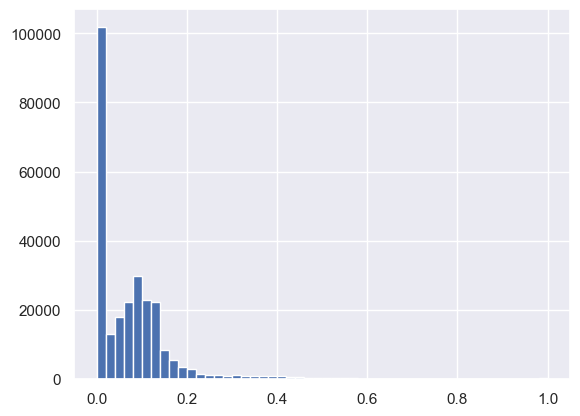

In [20]:
plt.hist(loan_data_defaults['recovery_rate'], 50)

(array([  92.,   74.,   87.,  559.,   90.,  108.,  750.,  234.,  111.,
         708.,  514.,  161.,  573.,  756.,  269.,  590.,  833.,  429.,
         602.,  928.,  621.,  644., 1023.,  735.,  813., 1064.,  890.,
         920., 1110.,  931., 1049., 1260., 1115., 1229., 1425., 1290.,
        1305., 1584., 1496., 1433., 1661., 1621., 1619., 1829., 1818.,
        1905., 2045., 1954., 2085., 2140., 2038., 2394., 2364., 2215.,
        2597., 2703., 2638., 3080., 2675., 2994., 3068., 3077., 3332.,
        3331., 3342., 3813., 3454., 3781., 3915., 3911., 4228., 4512.,
        4348., 4566., 4569., 4768., 4851., 4722., 5208., 4850., 5366.,
        5328., 4980., 6207., 5323., 5834., 6115., 5523., 6781., 5169.,
        6993., 5956., 5071., 6685., 4012., 6799., 3531., 5088., 2069.,
        3160.]),
 array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
        0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
        0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29

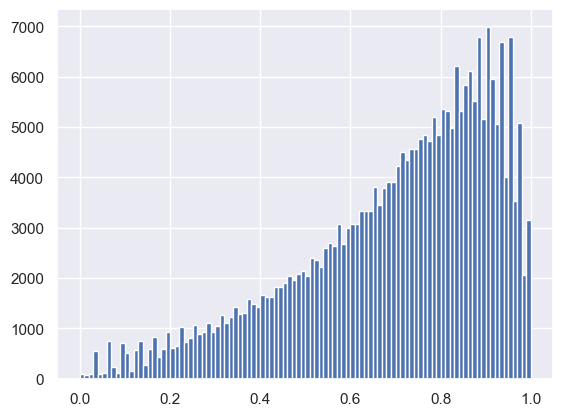

In [21]:
plt.hist(loan_data_defaults['CCF'], 100)

In [22]:
loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)

C:\Users\Anticus\AppData\Local\Temp\ipykernel_11808\3193898076.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loan_data_defaults['recovery_rate_0_1'] = np.where(loan_data_defaults['recovery_rate'] == 0, 0, 1)


In [23]:
loan_data_defaults['recovery_rate_0_1'].value_counts()

recovery_rate_0_1
1    177501
0     84915
Name: count, dtype: int64

# LGD Model

Stage 1 - Logistic Regression || Splitting Data

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
lgd_inputs_stage_1_train, lgd_inputs_stage_1_test, lgd_targets_stage_1_train, lgd_targets_stage_1_test  = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1),
                                                                                                                           loan_data_defaults['recovery_rate_0_1'],
                                                                                                                           test_size=0.2,
                                                                                                                           random_state=66)

Preparing the inputs

In [26]:
features_all = ['grade:A',
                'grade:B',
                'grade:C',
                'grade:D',
                'grade:E',
                'grade:F',
                'grade:G',
                'home_ownership:ANY',
                'home_ownership:MORTGAGE',
                'home_ownership:NONE',
                'home_ownership:OTHER',
                'home_ownership:OWN',
                'home_ownership:RENT',
                'verification_status:Not Verified',
                'verification_status:Source Verified',
                'verification_status:Verified',
                'purpose:car',
                'purpose:credit_card',
                'purpose:debt_consolidation',
                'purpose:educational',
                'purpose:home_improvement',
                'purpose:house',
                'purpose:major_purchase',
                'purpose:medical',
                'purpose:moving',
                'purpose:other',
                'purpose:renewable_energy',
                'purpose:small_business',
                'purpose:vacation',
                'purpose:wedding',
                'initial_list_status:f',
                'initial_list_status:w',
                'term_int',
                'emp_length_int',
                'mths_since_issue_date',
                'mths_since_earliest_cr_line',
                'funded_amnt',
                'int_rate',
                'installment',
                'annual_inc',
                'dti',
                'delinq_2yrs',
                'inq_last_6mths',
                'mths_since_last_delinq',
                'mths_since_last_record',
                'open_acc',
                'pub_rec',
                'total_acc',
                'acc_now_delinq',
                'total_rev_hi_lim',]

In [27]:
features_reference_cat = ['grade:G',
                        'home_ownership:RENT',
                        'verification_status:Verified',
                        'purpose:credit_card',
                        'initial_list_status:f']

In [28]:
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train[features_all]
lgd_inputs_stage_1_train = lgd_inputs_stage_1_train.drop(features_reference_cat, axis=1)

Estimating the Model

In [29]:
from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:

    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args, **kwargs)

    def fit(self, X, y):
        self.model.fit(X, y)

        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom, (X.shape[1], 1)).T
        F_ij = np.dot((X / denom).T, X)

        # Use a regularizer with a penalty of l2.
        Cramer_Rao = np.linalg.inv(F_ij + np.eye(X.shape[1]) * 0.01)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [30]:
reg_lgd_st_1 = LogisticRegression_with_p_values()
reg_lgd_st_1.fit(lgd_inputs_stage_1_train, lgd_targets_stage_1_train)

c:\Users\Anticus\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [31]:
feature_name = lgd_inputs_stage_1_train.columns.values

In [32]:
summary_table = pd.DataFrame(data=feature_name, columns=['Features Name'])
summary_table['Coefficient'] = np.transpose(reg_lgd_st_1.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_1.intercept_[0]]
summary_table = summary_table.sort_index()

p_values = np.append(np.nan, np.array(reg_lgd_st_1.p_values))
summary_table['P-values'] = p_values

In [33]:
summary_table

,Features Name,Coefficient,P-values
0,Intercept,-3.426996e-04,NaN
1,grade:A,-1.334089e-04,9.972435e-01
2,grade:B,-1.414178e-04,9.963204e-01
3,grade:C,-7.824343e-05,9.978192e-01
4,grade:D,-6.683821e-05,9.981792e-01
5,grade:E,2.114520e-05,9.994710e-01
6,grade:F,4.486885e-05,9.990508e-01
7,home_ownership:ANY,-1.318830e-07,9.999997e-01
8,home_ownership:MORTGAGE,9.957734e-06,9.992788e-01
9,home_ownership:NONE,2.143968e-07,9.999999e-01


Testing the Model

In [34]:
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test[features_all]
lgd_inputs_stage_1_test = lgd_inputs_stage_1_test.drop(features_reference_cat, axis=1)

In [35]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict(lgd_inputs_stage_1_test)

In [36]:
y_hat_test_proba_lgd_stage_1

array([1, 1, 1, ..., 1, 1, 1])

In [37]:
y_hat_test_proba_lgd_stage_1 = reg_lgd_st_1.model.predict_proba(lgd_inputs_stage_1_test)

In [38]:
y_hat_test_proba_lgd_stage_1

array([[0.34506268, 0.65493732],
       [0.32240238, 0.67759762],
       [0.20767847, 0.79232153],
       ...,
       [0.48716986, 0.51283014],
       [0.47788152, 0.52211848],
       [0.26035623, 0.73964377]])

In [39]:
y_hat_test_proba_lgd_stage_1 = y_hat_test_proba_lgd_stage_1[:][:, 1]

In [40]:
y_hat_test_proba_lgd_stage_1

array([0.65493732, 0.67759762, 0.79232153, ..., 0.51283014, 0.52211848,
       0.73964377])

In [41]:
lgd_targets_stage_1_test_temp = lgd_targets_stage_1_test.copy()
lgd_targets_stage_1_test_temp.reset_index(drop=True, inplace=True)

In [42]:
df_actual_predicted_probs = pd.concat([lgd_targets_stage_1_test_temp, pd.DataFrame(y_hat_test_proba_lgd_stage_1)], axis=1)

In [43]:
df_actual_predicted_probs.columns = ['lgd_targets_stage_1_test', 'y_hat_test_proba_lgd_stage_1']

In [44]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
0,0,0.654937
1,1,0.677598
2,1,0.792322
3,0,0.458652
4,0,0.691688


In [45]:
df_actual_predicted_probs.index = lgd_targets_stage_1_test.index

In [46]:
df_actual_predicted_probs.head()

,lgd_targets_stage_1_test,y_hat_test_proba_lgd_stage_1
908184,0,0.654937
632984,1,0.677598
1683149,1,0.792322
492741,0,0.458652
1093085,0,0.691688


Estimating the Accuracy of the Model

In [47]:
tr = 0.5
df_actual_predicted_probs['y_hat_test_lgd_stage_1'] = np.where(df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'] > tr, 1, 0)

In [48]:
pd.crosstab(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1'], rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,1621,15224
1,1364,34275


In [49]:
from sklearn.metrics import classification_report, roc_curve, roc_auc_score

In [50]:
print(classification_report(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_lgd_stage_1']))

              precision    recall  f1-score   support

           0       0.54      0.10      0.16     16845
           1       0.69      0.96      0.81     35639

    accuracy                           0.68     52484
   macro avg       0.62      0.53      0.48     52484
weighted avg       0.64      0.68      0.60     52484



In [51]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])

Text(0.5, 1.0, 'ROC Curve')

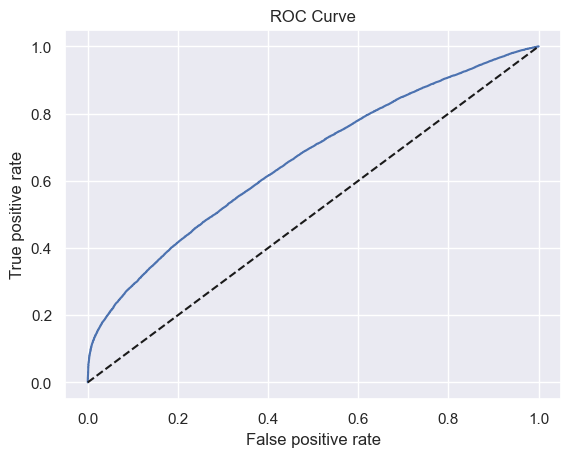

In [52]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle='--', color='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC Curve')

In [53]:
AUROC = roc_auc_score(df_actual_predicted_probs['lgd_targets_stage_1_test'], df_actual_predicted_probs['y_hat_test_proba_lgd_stage_1'])
AUROC

0.6607152887488369

Saving the train Model

In [54]:
import pickle

In [121]:
# pickle.dump(reg_lgd_st_1, open('lgd_model_stage_1.sav', 'wb'))

Stage 2 - Linear Regression

In [56]:
lgd_stage_2_data = loan_data_defaults[loan_data_defaults['recovery_rate_0_1'] == 1]

In [57]:
lgd_inputs_stage_2_train, lgd_inputs_stage_2_test, lgd_targets_stage_2_train, lgd_targets_stage_2_test = train_test_split(lgd_stage_2_data.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1),
                                                                                                                           lgd_stage_2_data['recovery_rate'],
                                                                                                                           test_size=0.2,
                                                                                                                           random_state=66)

In [58]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [59]:
import scipy.stats as stat

class LinearRegression(linear_model.LinearRegression):
    def __init__(self, fit_intercept=True, normalize=False, copy_X=True, n_jobs=1):
        super().__init__(fit_intercept=fit_intercept, copy_X=copy_X, n_jobs=n_jobs)
        self.fit_intercept = fit_intercept
        self.normalize = normalize
        self.copy_X = copy_X
        self.n_jobs = n_jobs

    def fit(self, X, y, n_jobs=1):
        super().fit(X, y, n_jobs)
        self.coef_ = self.coef_.ravel()
        sse = np.sum((self.predict(X) - y) ** 2, axis=0) / float(X.shape[0] - X.shape[1])
        se = np.array([np.sqrt(np.diagonal(sse * np.linalg.inv(np.dot(X.T, X))))])
        self.t_ = self.coef_ / se
        self.p_ = np.squeeze(2 * (1 - stat.t.cdf(np.abs(self.t_), y.shape[0] - X.shape[1])))
        return self

In [60]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train[features_all]

In [61]:
lgd_inputs_stage_2_train = lgd_inputs_stage_2_train.drop(features_reference_cat, axis=1)

In [62]:
reg_lgd_st_2 = LinearRegression()
reg_lgd_st_2.fit(lgd_inputs_stage_2_train, lgd_targets_stage_2_train)

LinearRegression()

In [63]:
feature_name = lgd_inputs_stage_2_train.columns.values

In [64]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficents'] = np.transpose(reg_lgd_st_2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_lgd_st_2.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_lgd_st_2.p_
p_values = np.append(np.nan, np.array(p_values))
summary_table['P_values'] = p_values.round(3)

In [65]:
summary_table

,Feature name,Coefficents,P_values
0,Intercept,1.830523e-01,NaN
1,grade:A,-3.081033e-02,0.000
2,grade:B,-3.275048e-02,0.000
3,grade:C,-2.699045e-02,0.000
4,grade:D,-1.861381e-02,0.000
5,grade:E,-1.114110e-02,0.000
6,grade:F,-3.814022e-03,0.047
7,home_ownership:ANY,3.329243e-02,0.072
8,home_ownership:MORTGAGE,4.424301e-03,0.000
9,home_ownership:NONE,1.404869e-01,0.000


Stage 2 - Liner Regression Evaluation

In [66]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test[features_all]

In [67]:
lgd_inputs_stage_2_test = lgd_inputs_stage_2_test.drop(features_reference_cat, axis=1)

In [68]:
lgd_inputs_stage_2_test.columns

Index(['grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F',
       'home_ownership:ANY', 'home_ownership:MORTGAGE', 'home_ownership:NONE',
       'home_ownership:OTHER', 'home_ownership:OWN',
       'verification_status:Not Verified',
       'verification_status:Source Verified', 'purpose:car',
       'purpose:debt_consolidation', 'purpose:educational',
       'purpose:home_improvement', 'purpose:house', 'purpose:major_purchase',
       'purpose:medical', 'purpose:moving', 'purpose:other',
       'purpose:renewable_energy', 'purpose:small_business',
       'purpose:vacation', 'purpose:wedding', 'initial_list_status:w',
       'term_int', 'emp_length_int', 'mths_since_issue_date',
       'mths_since_earliest_cr_line', 'funded_amnt', 'int_rate', 'installment',
       'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'total_acc', 'acc_now_delinq', 'total_rev_hi_lim'],
      dtype='obj

In [69]:
y_hat_test_lgd_stage_2 = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

In [70]:
lgd_targets_stage_2_train_temp = lgd_targets_stage_2_train

In [71]:
lgd_targets_stage_2_train_temp = lgd_targets_stage_2_train_temp.reset_index(drop=True)

In [72]:
pd.concat([lgd_targets_stage_2_train_temp, pd.DataFrame(y_hat_test_lgd_stage_2)], axis=1).corr()

,recovery_rate,0
recovery_rate,1.000000,-0.007146
0,-0.007146,1.000000


Residuals 

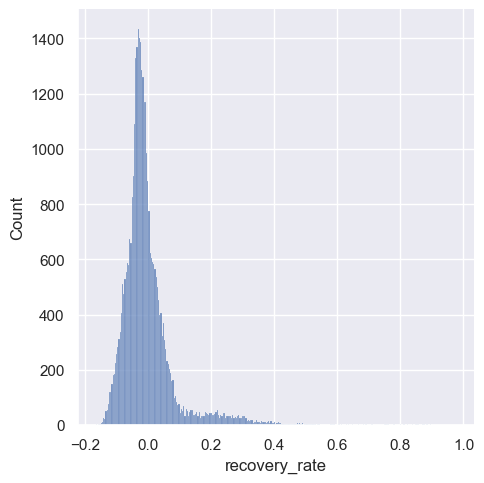

In [73]:
sns.displot(lgd_targets_stage_2_test - y_hat_test_lgd_stage_2)

In [122]:
# pickle.dump(reg_lgd_st_2, open('reg_lgd_st_2.sav', 'wb'))

Combining Stage 1 and Stage 2

In [75]:
y_hat_test_lgd_stage_2_all = reg_lgd_st_2.predict(lgd_inputs_stage_2_test)

In [76]:
y_hat_test_lgd_stage_2_all

array([0.13026716, 0.10840905, 0.11197364, ..., 0.11094834, 0.09727977,
       0.1117612 ])

In [77]:
y_hat_test_lgd = y_hat_test_lgd_stage_2 * y_hat_test_lgd_stage_2_all

In [78]:
pd.DataFrame(y_hat_test_lgd).describe()

,0
count,35501.000000
mean,0.012155
std,0.004344
min,0.000005
25%,0.009297
50%,0.012023
75%,0.014985
max,0.057717


# EAD Model

Estimation and Interpretatio


In [79]:
ead_inputs_train, ead_inputs_test, ead_targets_train, ead_targets_test = train_test_split(loan_data_defaults.drop(['good_bad', 'recovery_rate', 'recovery_rate_0_1', 'CCF'], axis=1),
                                                                                          loan_data_defaults['CCF'],
                                                                                          test_size=0.2,
                                                                                          random_state=66)

In [80]:
ead_inputs_train = ead_inputs_train[features_all]

In [81]:
ead_inputs_train = ead_inputs_train.drop(features_reference_cat, axis=1)

In [82]:
reg_ead = LinearRegression()
reg_ead.fit(ead_inputs_train, ead_targets_train)

LinearRegression()

In [83]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficents'] = np.transpose(reg_ead.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg_ead.intercept_]
summary_table = summary_table.sort_index()
p_values = reg_ead.p_
p_values = np.append(np.nan, np.array(p_values))
summary_table['P_values'] = p_values.round(3)

In [84]:
summary_table

,Feature name,Coefficents,P_values
0,Intercept,5.767422e-01,NaN
1,grade:A,3.307724e-02,0.000
2,grade:B,3.016472e-02,0.000
3,grade:C,2.963928e-02,0.000
4,grade:D,2.493478e-02,0.000
5,grade:E,1.667921e-02,0.000
6,grade:F,6.642446e-03,0.044
7,home_ownership:ANY,2.083292e-02,0.486
8,home_ownership:MORTGAGE,-3.763966e-04,0.691
9,home_ownership:NONE,1.165451e-01,0.107


Model Validation

In [85]:
ead_inputs_test = ead_inputs_test[features_all]

In [86]:
ead_inputs_test = ead_inputs_test.drop(features_reference_cat, axis=1)

In [87]:
y_hat_test_ead = reg_ead.predict(ead_inputs_test)

In [88]:
ead_targets_test_temp = ead_targets_test

In [89]:
ead_targets_test_temp = ead_targets_test_temp.reset_index(drop=True)

In [90]:
pd.concat([ead_targets_test_temp, pd.DataFrame(y_hat_test_ead)], axis=1).corr()

,CCF,0
CCF,1.000000,0.483385
0,0.483385,1.000000


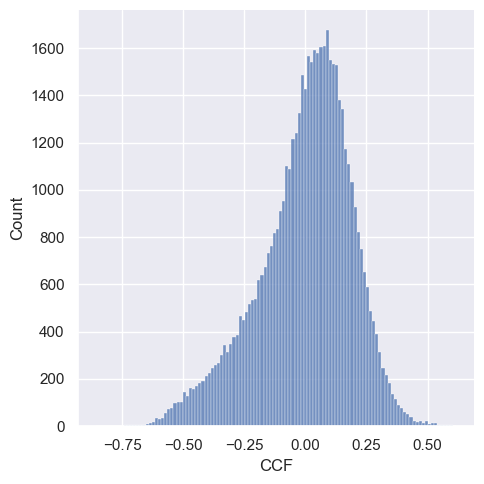

In [91]:
sns.displot(ead_targets_test - y_hat_test_ead)

In [92]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,52484.000000
mean,0.698692
std,0.104234
min,0.273826
25%,0.624321
50%,0.695523
75%,0.769456
max,1.049574


In [93]:
y_hat_test_ead = np.where(y_hat_test_ead > 1, 1, y_hat_test_ead)

In [94]:
pd.DataFrame(y_hat_test_ead).describe()

,0
count,52484.000000
mean,0.698666
std,0.104156
min,0.273826
25%,0.624321
50%,0.695523
75%,0.769456
max,1.000000


# Expected Loss

In [95]:
loan_data_preprocessed.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_date,mths_since_issue_date,good_bad,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w
0,0,NaN,NaN,2500,2500,2500.0,36 months,13.56,84.92,C,C1,Chef,10+ years,RENT,55000.0,Not Verified,Dec-2018,Current,n,NaN,NaN,debt_consolidation,Debt consolidation,109xx,NY,18.24,0.0,Apr-2001,1.0,NaN,45.0,9.0,1.0,4341,10.3,34.0,w,2386.02,2386.02,167.02,167.02,113.98,53.04,0.0,0.0,0.0,Feb-2019,84.92,Mar-2019,Feb-2019,0.0,NaN,1,Individual,NaN,NaN,NaN,0.0,0.0,16901.0,2.0,2.0,1.0,2.0,2.0,12560.0,69.0,2.0,7.0,2137.0,28.0,42000.0,1.0,11.0,2.0,9.0,1878.0,34360.0,5.9,0.0,0.0,140.0,212.0,1.0,1.0,0.0,1.0,NaN,2.0,NaN,0.0,2.0,5.0,3.0,3.0,16.0,7.0,18.0,5.0,9.0,0.0,0.0,0.0,3.0,100.0,0.0,1.0,0.0,60124.0,16901.0,36500.0,18124.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,10.0,2001-04-01,203.0,36,2018-12-01,37.0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,NaN,NaN,30000,30000,30000.0,60 months,18.94,777.23,D,D2,Postmaster,10+ years,MORTGAGE,90000.0,Source Verified,Dec-2018,

In [96]:
loan_data_preprocessed['mths_since_last_delinq'].fillna(0, inplace=True)
loan_data_preprocessed['mths_since_last_record'].fillna(0, inplace=True)

loan_data_preprocessed['dti'].fillna(loan_data_preprocessed['dti'].median(), inplace=True)

In [97]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed[features_all]

In [98]:
loan_data_preprocessed_lgd_ead = loan_data_preprocessed_lgd_ead.drop(features_reference_cat, axis=1)

LGD

In [99]:
loan_data_preprocessed['recovery_rate_st_1'] = reg_lgd_st_1.model.predict(loan_data_preprocessed_lgd_ead)

In [100]:
loan_data_preprocessed['recovery_rate_st_2'] = reg_lgd_st_2.predict(loan_data_preprocessed_lgd_ead)

In [101]:
loan_data_preprocessed['recovery_rate'] = loan_data_preprocessed['recovery_rate_st_1'] * loan_data_preprocessed['recovery_rate_st_2']

In [102]:
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] < 0, 0, loan_data_preprocessed['recovery_rate'])
loan_data_preprocessed['recovery_rate'] = np.where(loan_data_preprocessed['recovery_rate'] > 1, 1, loan_data_preprocessed['recovery_rate'])

In [103]:
loan_data_preprocessed['LGD'] = 1 - loan_data_preprocessed['recovery_rate']

In [104]:
loan_data_preprocessed['LGD'].describe()

count    2.260668e+06
mean     9.044242e-01
std      4.422860e-02
min      4.014641e-01
25%      8.751077e-01
50%      8.898908e-01
75%      9.116886e-01
max      1.000000e+00
Name: LGD, dtype: float64

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00, 2.00000e+00,
        1.00000e+00, 3.00000e+00, 2.00000e+00, 1.00000e+01, 1.10000e+01,
        1.10000e+01, 2.00000e+00, 1.00000e+00, 7.00

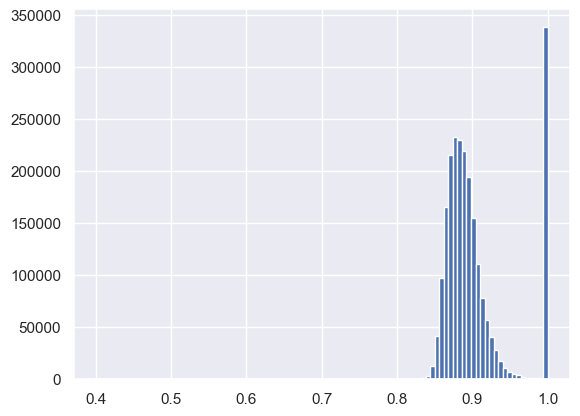

In [105]:
plt.hist(loan_data_preprocessed['LGD'], 100)

EAD

In [106]:
loan_data_preprocessed['CCF'] = reg_ead.predict(loan_data_preprocessed_lgd_ead)

In [107]:
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] < 0, 0, loan_data_preprocessed['CCF'])
loan_data_preprocessed['CCF'] = np.where(loan_data_preprocessed['CCF'] > 1, 1, loan_data_preprocessed['CCF'])

In [108]:
loan_data_preprocessed['EAD'] = loan_data_preprocessed['CCF'] * loan_data_preprocessed_lgd_ead['funded_amnt']

In [109]:
loan_data_preprocessed['EAD'].describe()

count    2.260668e+06
mean     1.077212e+04
std      7.302479e+03
min      1.146820e+01
25%      5.078230e+03
50%      8.965362e+03
75%      1.473918e+04
max      4.000000e+04
Name: EAD, dtype: float64

PD

In [110]:
loan_data_inputs_pd = pd.concat([pd.read_csv('loan_data_inputs_train.csv'), pd.read_csv('loan_data_inputs_test.csv')], axis=0)

In [111]:
loan_data_inputs_pd.shape, loan_data_preprocessed.shape

((2260668, 133), (2260668, 191))

In [112]:
loan_data_inputs_pd.head()

,Unnamed: 0,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ONE_ATHER_ANY,home_ownership:RENT,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_AR_MS_OK_LA,addr_state:NV_NM_HI,addr_state:MO_MD_NC_PA_KY_TN,addr_state:NJ_MI_IN_VA_MN_AK_AZ_NE_OH,addr_state:DE_MA_UT,addr_state:WI_GA,addr_state:RI_WY_IL,addr_state:MT_KS,addr_state:CT_ND_WA_CO_SC,addr_state:WV_OR_NH,addr_state:DC_ID,addr_state:VT_ME,addr_state:IA,addr_state:NY,addr_state:SD,addr_state:FL,addr_state:CA,addr_state:TX,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educational__small_business__renewable_energy__moving,purpose:debt_consolidation,purpose:medical_wedding_other_house_vacation_major_purchase,purpose:home_improvement,purpose:credit_card,purpose:car,initial_list_status:f,initial_list_status:w,term_int:36,term_int:60,emp_length_int:0,emp_length_int:1,emp_length_int:2-6,emp_length_int:7-9,emp_length_int:10,mths_since_issue_date:<40,mths_since_issue_date:40-43,mths_since_issue_date:44-45,mths_since_issue_date:46-48,mths_since_issue_date:47-51,mths_since_issue_date:52-55,mths_since_issue_date:55-59,mths_since_issue_date:60-65,mths_since_issue_date:66-76,mths_since_issue_date:77-96,mths_since_issue_date:97-113,mths_since_issue_date:114-135,mths_since_issue_date:>136,int_rate:<8.392,int_rate:8.392-11.987,int_rate:11.987-15.068,int_rate:15.068-22.772,int_rate:>22.772,mths_since_earliest_cr_line:<22,mths_since_earliest_cr_line:22-41,mths_since_earliest_cr_line:42-62,mths_since_earliest_cr_line:63-144,mths_since_earliest_cr_line:145-310,mths_since_earliest_cr_line:311-537,mths_since_earliest_cr_line:>538,annual_inc:<=5k,annual_inc:5k-10k,annual_inc:10k-30k,annual_inc:30k-45k,annual_inc:45k-65k,annual_inc:65k-85k,annual_inc:85k-100k,annual_inc:100k-125k,annual_inc:125k-160k,annual_inc:160k-185k,annual_inc:185k-200k,annual_inc:>200k,mths_since_last_delinq:Missing,mths_since_last_delinq:0-4,mths_since_last_delinq:5-19,mths_since_last_delinq:20-85,mths_since_last_delinq:>86,dti:<=2,dti:2-6,dti:6-10,dti:10-14,dti:14-19,dti:19-21,dti:21-26,dti:26-30,dti:30-35,dti:35-40,dti:40-52,dti:>52,delinq_2yrs:<=0.42,delinq_2yrs:0.42-0.84,delinq_2yrs:0.84-1.26,delinq_2yrs:1.26-2.1,delinq_2yrs:2.1-3.36,delinq_2yrs:>3.36,inq_last_6mths:<=1.32,inq_last_6mths:1.32-3.3,inq_last_6mths:3.3-5.28,inq_last_6mths:>5.28,open_acc:<=6,open_acc:6-8,open_acc:8-32,open_acc:>32,pub_rec:<=0.287,pub_rec:0.287-1.147,pub_rec:1.147-2,pub_rec:>2,total_acc:<=4,total_acc:4-11,total_acc:11-35,total_acc:35-56,total_acc:56-84,total_acc:>84,total_rev_hi_lim:<=50k,total_rev_hi_lim:50k-200k,total_rev_hi_lim:>200k,acc_now_delinq:<=0.07,acc_now_delinq:>0.07,mths_since_last_record:<=0.645,mths_since_last_record:>0.645
0,305053,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
1,50247,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
2,1630001,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
3,927626,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0
4,758488,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,

In [113]:
loan_data_inputs_pd = loan_data_inputs_pd.set_index('Unnamed: 0')

In [114]:
features_all_pd = list(loan_data_inputs_pd.columns.values)

In [115]:
features_reference_cat_pd = pd.read_csv('ref_categorie.csv', index_col=0)
features_reference_cat_pd.columns = ['Ref_Features']

In [116]:
features_reference_cat_pd_temp = loan_data_inputs_pd[features_all_pd]

In [117]:
features_reference_cat_pd_temp = features_reference_cat_pd_temp.drop(features_reference_cat_pd['Ref_Features'], axis=1)

In [118]:
features_reference_cat_pd_temp.shape

(2260668, 110)

In [119]:
reg_pd = pickle.load(open('pd_model.sav', 'rb'))

FileNotFoundError: [Errno 2] No such file or directory: 'pd_model.sav'

In [ ]:
loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(features_reference_cat_pd_temp)[:][ : , 0]

C:\Users\Anticus\AppData\Local\Temp\ipykernel_16888\2836248526.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_inputs_pd['PD'] = reg_pd.model.predict_proba(features_reference_cat_pd_temp)[:][ : , 0]


In [ ]:
loan_data_inputs_pd['PD'].head()

Unnamed: 0
305053     0.074660
50247      0.005428
1630001    0.086331
927626     0.159420
758488     0.148064
Name: PD, dtype: float64

In [ ]:
loan_data_inputs_pd['PD'].describe()

count    2.260668e+06
mean     1.258955e-01
std      1.015180e-01
min      3.892139e-04
25%      4.578997e-02
50%      1.038204e-01
75%      1.826226e-01
max      6.900759e-01
Name: PD, dtype: float64

EL

In [ ]:
loan_data_preprocessed_new = pd.concat([loan_data_preprocessed, loan_data_inputs_pd], axis=1)

In [ ]:
loan_data_preprocessed_new.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,revol_bal_joint,sec_app_earliest_cr_line,sec_app_inq_last_6mths,sec_app_mort_acc,sec_app_open_acc,sec_app_revol_util,sec_app_open_act_il,sec_app_num_rev_accts,sec_app_chargeoff_within_12_mths,sec_app_collections_12_mths_ex_med,sec_app_mths_since_last_major_derog,hardship_flag,hardship_type,hardship_reason,hardship_status,deferral_term,hardship_amount,hardship_start_date,hardship_end_date,payment_plan_start_date,hardship_length,hardship_dpd,hardship_loan_status,orig_projected_additional_accrued_interest,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,emp_length_int,earliest_cr_line_date,mths_since_earliest_cr_line,term_int,issue_date,mths_since_issue_date,good_bad,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ANY,home_ownership:MORTGAGE,home_ownership:NONE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,initial_list_status:f,initial_list_status:w,recovery_rate_st_1,recovery_rate_st_2,recovery_rate,LGD,CCF,EAD,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:ONE_ATHER_ANY,home_ownership:RENT,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:AL_AR_MS_OK_LA,addr_state:NV_NM_HI,addr_state:MO_MD_NC_PA_KY_TN,addr_state:NJ_MI_IN_VA_MN_AK_AZ_NE_OH,addr_state:DE_MA_UT,addr_state:WI_GA,addr_state:RI_WY_IL,addr_state:MT_KS,addr_state:CT_ND_WA_CO_SC,addr_state:WV_OR_NH,addr_state:DC_ID,addr_state:VT_ME,addr_state:IA,addr_state:NY,addr_state:SD,addr_state:FL,addr_state:CA,addr_state:TX,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,purpose:educational__small_business__renewable_energy__moving,purpose:debt_consolidation,purpose:medical_wedding_other_house_vacation_major_purchase,purpose:home_improvement,purpose:credit_card,purpose:car,initial_list_status:f,initial_list_status:w,term_int:36,term_int:60,emp_length_int:0,emp_length_int:1,emp_length_i

In [ ]:
loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']

C:\Users\Anticus\AppData\Local\Temp\ipykernel_16888\3609698688.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  loan_data_preprocessed_new['EL'] = loan_data_preprocessed_new['PD'] * loan_data_preprocessed_new['LGD'] * loan_data_preprocessed_new['EAD']


In [ ]:
pd.set_option('float_format', '{:.3f}'.format)

In [ ]:
loan_data_preprocessed_new['EL'].describe()

count   2260668.000
mean       1243.003
std        1533.370
min           0.530
25%         263.117
50%         672.997
75%        1624.157
max       18502.578
Name: EL, dtype: float64

In [ ]:
plt.hist(loan_data_preprocessed_new['EL'], 50)

In [ ]:
loan_data_preprocessed_new[['funded_amnt', 'PD', 'LGD', 'EAD', 'EL']].head(30)

NameError: name 'loan_data_preprocessed_new' is not defined

In [ ]:
loan_data_preprocessed_new['funded_amnt'].describe()

count   2260668.000
mean      15041.664
std        9188.413
min         500.000
25%        8000.000
50%       12875.000
75%       20000.000
max       40000.000
Name: funded_amnt, dtype: float64

Total portopholio loss

In [ ]:
loan_data_preprocessed_new['funded_amnt'].sum()

34004208600

In [ ]:
loan_data_preprocessed_new['EL'].sum()

2810016630.5066123

In [ ]:
loan_data_preprocessed_new['EL'].sum() / loan_data_preprocessed_new['funded_amnt'].sum()

0.08263731891430087

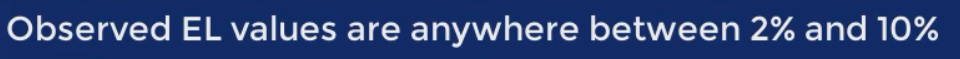